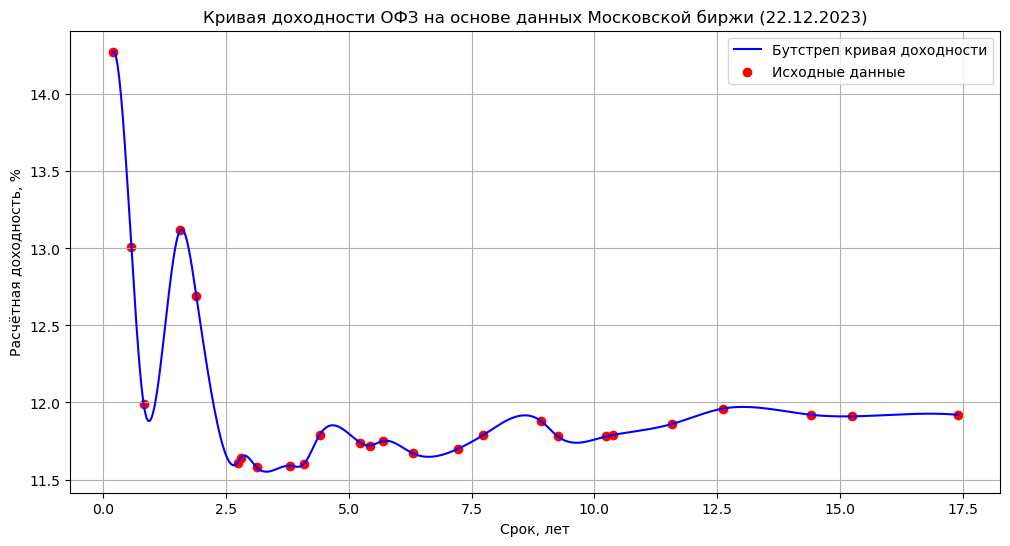

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.interpolate import CubicSpline

# Загрузка данных из файла Excel
file_path = 'D:\\b.xlsx'  
data = pd.read_excel(file_path)

# Преобразование даты погашения в срок (в годах)
current_date = datetime(2023, 12, 22)
data['Дата погашения'] = pd.to_datetime(data['Дата погашения'])
data['Срок, лет'] = (data['Дата погашения'] - current_date).dt.days / 365

# Выбор столбцов сроков и доходностей
terms = data['Срок, лет']
rates = data['Расчётная доходность']

# Определение функции для бутстрепа кривой доходности
def bootstrap_yield_curve(terms, rates):
    # Используем кубический сплайн для интерполяции между точками
    cs = CubicSpline(terms, rates)
    return cs

# Создание кривой доходности с помощью бутстрепа
yield_curve = bootstrap_yield_curve(terms, rates)

# Генерация значений для графика
terms_fine = np.linspace(terms.min(), terms.max(), 500)
rates_fine = yield_curve(terms_fine)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(terms_fine, rates_fine, label='Бутстреп кривая доходности', color='blue')
plt.scatter(terms, rates, color='red', label='Исходные данные')
plt.title('Кривая доходности ОФЗ на основе данных Московской биржи (22.12.2023)')
plt.xlabel('Срок, лет')
plt.ylabel('Расчётная доходность, %')
plt.legend()
plt.grid(True)
plt.show()


#Планируется дальнейшая разработка модели. 